<a href="https://colab.research.google.com/github/CodEEBuzZ/AI-and-Data-Analysis/blob/main/Employee_Burnout_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap dash

In [4]:
import pandas as pd
df = pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [5]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [8]:
df = pd.get_dummies(df, drop_first=True)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Designation', 'Mental Fatigue Score']] = scaler.fit_transform(df[['Designation', 'Mental Fatigue Score']])

In [10]:
import pandas as pd
import numpy as np
df = pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")
print(df.info())
print(df.describe())
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Company Type'] = df['Company Type'].map({'Product': 0, 'Service': 1})
df['WFH Setup Available'] = df['WFH Setup Available'].map({'No': 0, 'Yes': 1})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB
None
                     Date of Joining   Designation  Resource Allocation  \
count                          22750  22750.000000         21369.000000   
mean   2008-07-01 

In [11]:
from datetime import datetime
df['Tenure (Years)'] = (datetime.now() - pd.to_datetime(df['Date of Joining'])).dt.days / 365
df['Designation_Resource'] = df['Designation'] * df['Resource Allocation']
df['Mental_Resource'] = df['Mental Fatigue Score'] * df['Resource Allocation']
df.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)

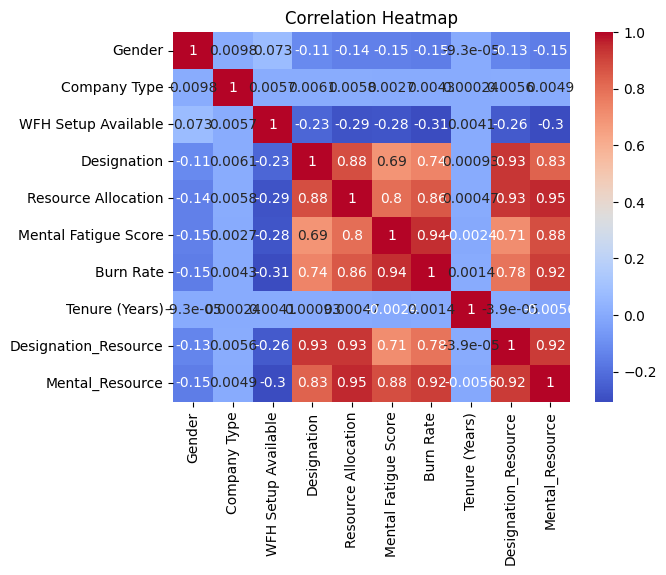

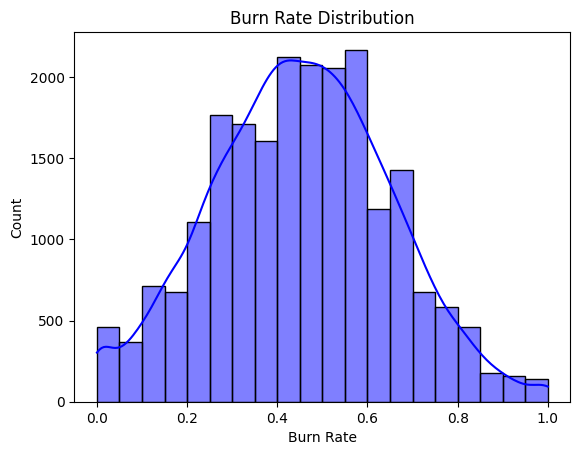

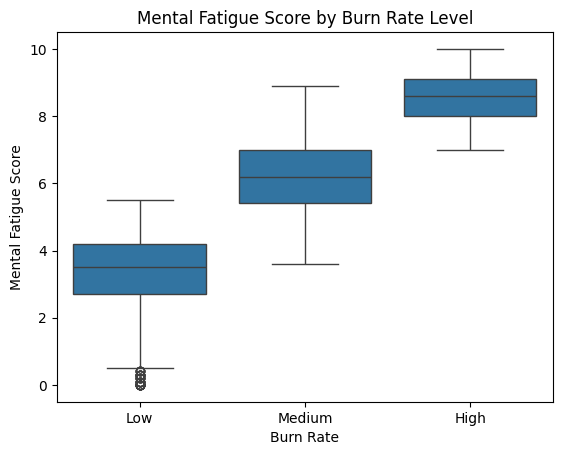

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
sns.histplot(df['Burn Rate'], kde=True, bins=20, color='blue')
plt.title("Burn Rate Distribution")
plt.show()
sns.boxplot(x=pd.cut(df['Burn Rate'], bins=[0, 0.3, 0.7, 1], labels=['Low', 'Medium', 'High']),
            y='Mental Fatigue Score', data=df)
plt.title("Mental Fatigue Score by Burn Rate Level")
plt.show()

In [13]:
print(df.columns)

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate',
       'Tenure (Years)', 'Designation_Resource', 'Mental_Resource'],
      dtype='object')


In [14]:
from sklearn.model_selection import train_test_split

# Ensure the target column exists and has no NaNs
assert 'Burn Rate' in df.columns, "Column 'Burn Rate' not found in DataFrame!"
df['Burn Rate'] = pd.to_numeric(df['Burn Rate'], errors='coerce')
df['Burn Rate'].fillna(df['Burn Rate'].median(), inplace=True)

# Define features and target
X = df.drop('Burn Rate', axis=1)
y = df['Burn Rate']

# Ensure all features are numeric
X = pd.get_dummies(X, drop_first=True)

# Confirm shapes
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Features shape: (22750, 9), Target shape: (22750,)
Train size: 18200, Test size: 4550


<ipython-input-14-929a8d8157d9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Burn Rate'].fillna(df['Burn Rate'].median(), inplace=True)


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Burn Rate', axis=1)
y = df['Burn Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-Squared Score: {r2}")

Mean Absolute Error: 0.0556394855485784
R-Squared Score: 0.8398781100178085


In [ ]:
from flask import Flask, request, jsonify
import joblib
joblib.dump(model, "burnout_model.pkl")
app = Flask(__name__)
loaded_model = joblib.load("burnout_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    prediction = loaded_model.predict([data['features']])
    return jsonify({'burnout_rate': prediction[0]})

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [18]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [19]:
import streamlit as st
import pandas as pd
import joblib
model = joblib.load("burnout_model.pkl")

st.title("Burnout Prediction Dashboard")
features = []
for col in X.columns:
    val = st.number_input(f"Enter {col}", value=0.0)
    features.append(val)
if st.button("Predict Burnout Rate"):
    prediction = model.predict([features])
    st.write(f"Predicted Burnout Rate: {prediction[0]:.2f}")


2024-12-24 14:41:12.829 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:41:12.964 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-24 14:41:12.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:41:12.971 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:41:12.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:41:12.975 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:41:12.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:41:12.980 Session state does not 

<ipython-input-20-ac10324e6855>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Burn Rate Category', y='Mental Fatigue Score', data=df, palette='Set2')


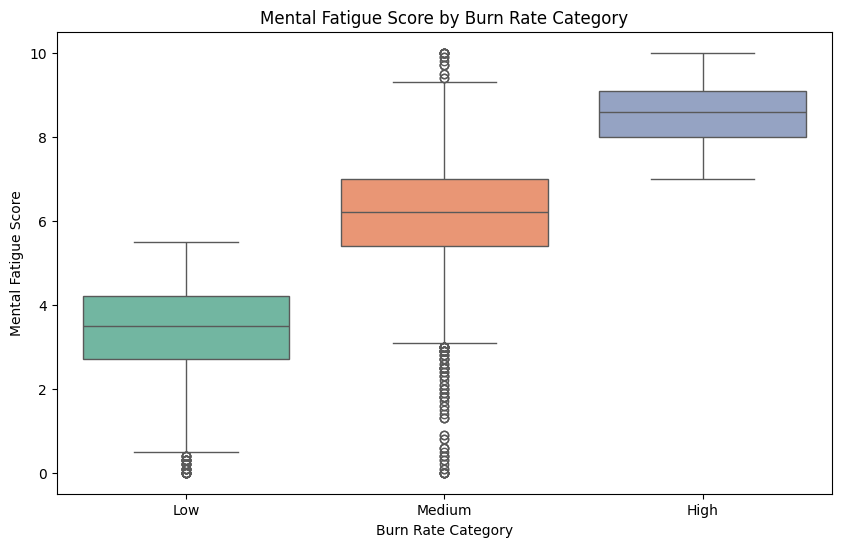

<ipython-input-20-ac10324e6855>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Burn Rate Category', y='Tenure (Years)', data=df, palette='Set2')


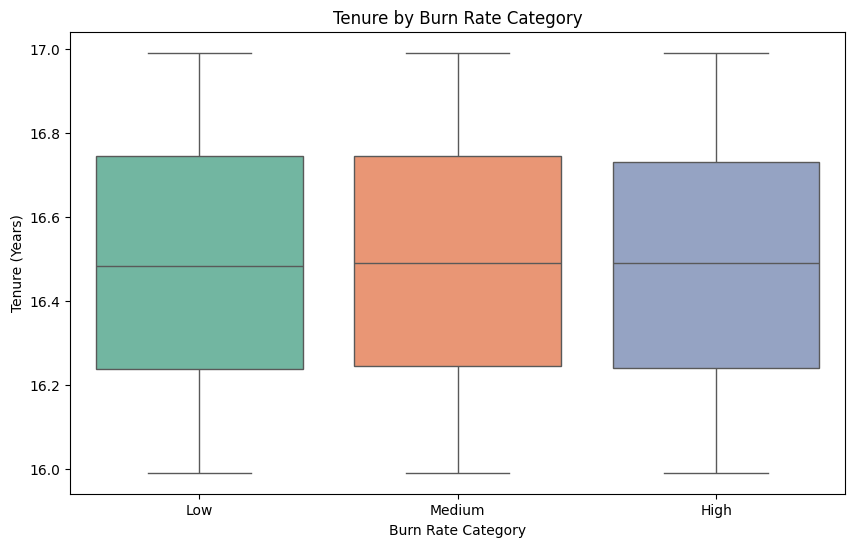

In [20]:
df['Burn Rate Category'] = pd.cut(df['Burn Rate'], bins=[0, 0.3, 0.7, 1], labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Burn Rate Category', y='Mental Fatigue Score', data=df, palette='Set2')
plt.title("Mental Fatigue Score by Burn Rate Category")
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Burn Rate Category', y='Tenure (Years)', data=df, palette='Set2')
plt.title("Tenure by Burn Rate Category")
plt.show()


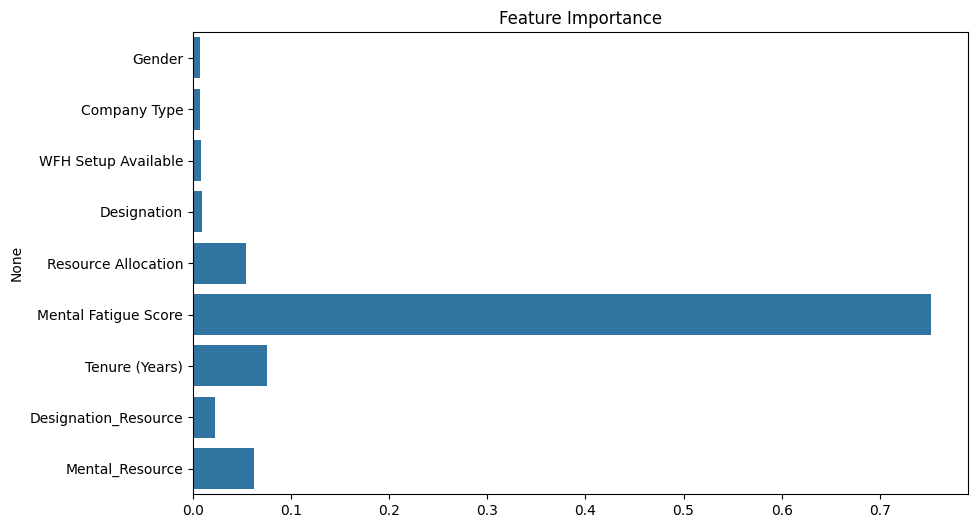

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.show()

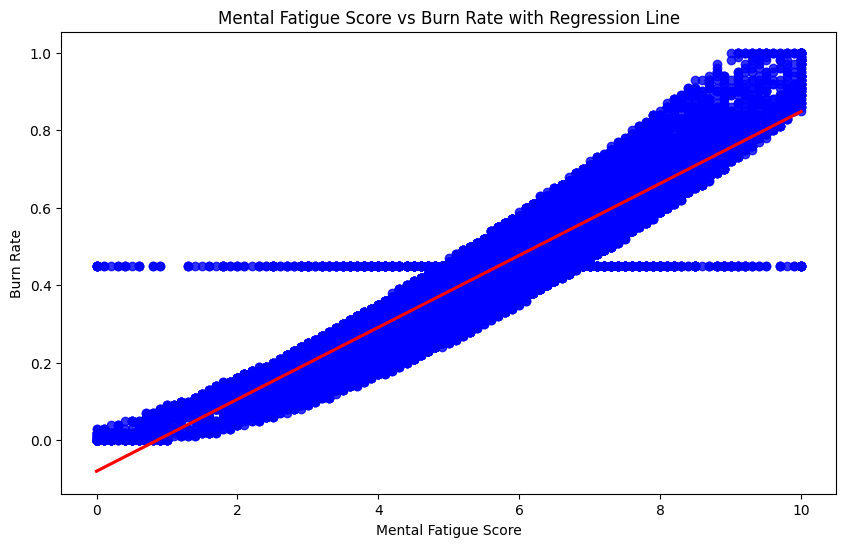

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Mental Fatigue Score', y='Burn Rate', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Mental Fatigue Score vs Burn Rate with Regression Line")
plt.show()

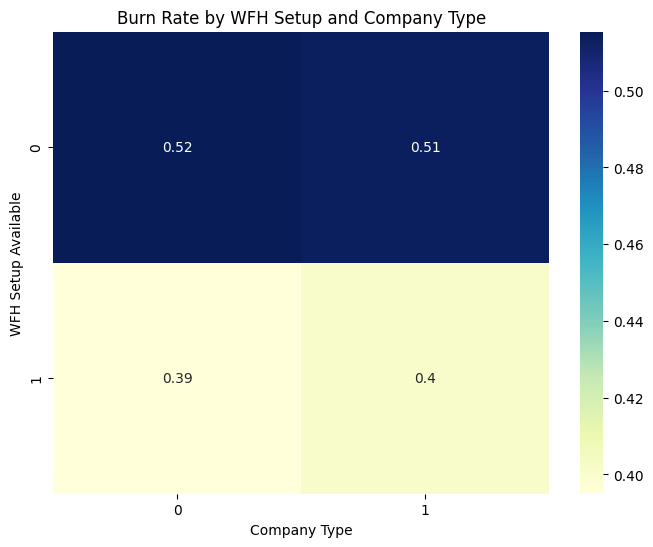

In [23]:
heatmap_data = df.pivot_table(values='Burn Rate', index='WFH Setup Available', columns='Company Type', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title("Burn Rate by WFH Setup and Company Type")
plt.show()

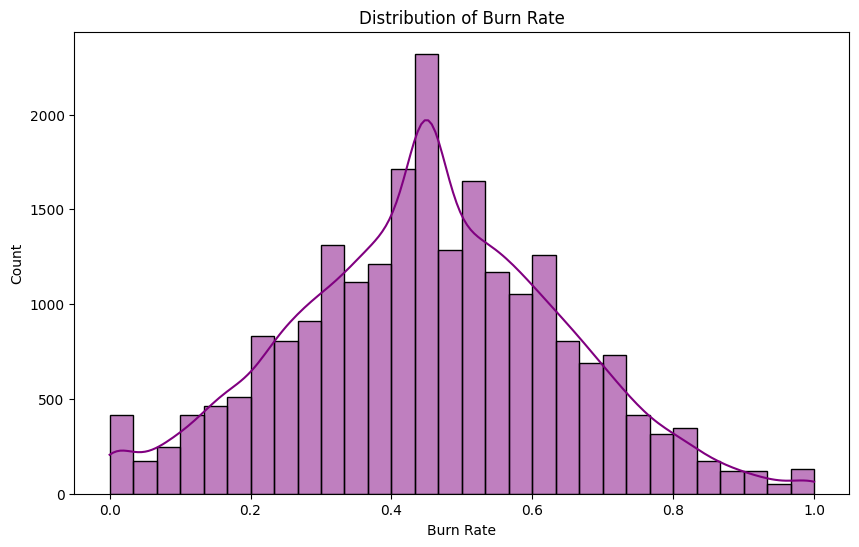

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Burn Rate'], kde=True, color='purple', bins=30)
plt.title("Distribution of Burn Rate")
plt.show()

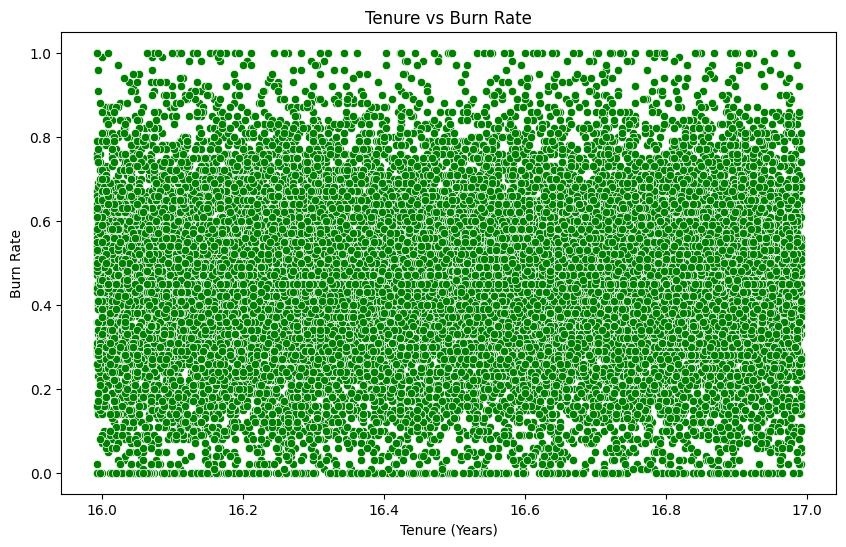

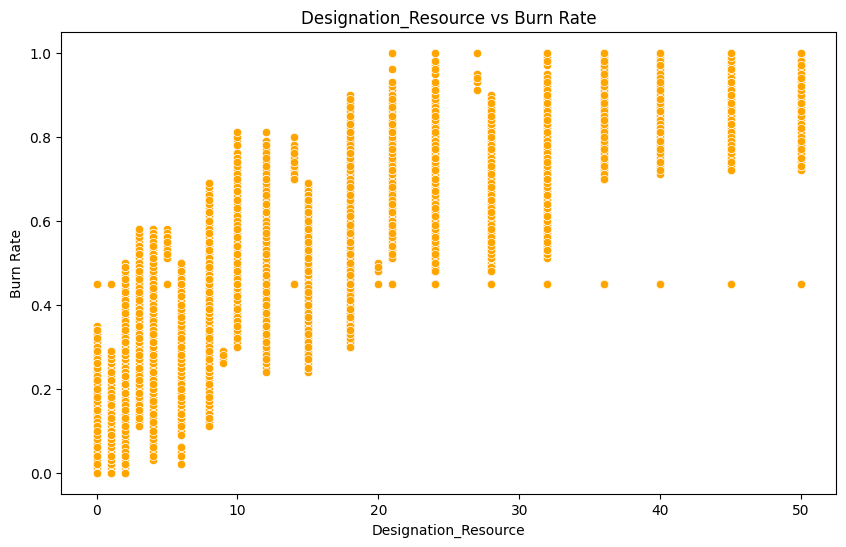

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure (Years)', y='Burn Rate', data=df, color='green')
plt.title("Tenure vs Burn Rate")
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Designation_Resource', y='Burn Rate', data=df, color='orange')
plt.title("Designation_Resource vs Burn Rate")
plt.show()


<ipython-input-26-7132a3206c8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company Type', y='Mental Fatigue Score', data=df, palette='Set1')


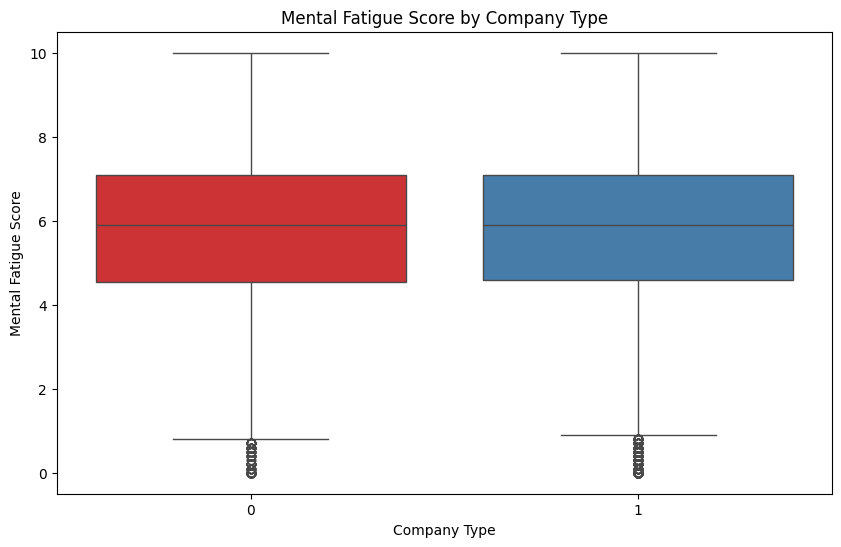

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company Type', y='Mental Fatigue Score', data=df, palette='Set1')
plt.title("Mental Fatigue Score by Company Type")
plt.show()

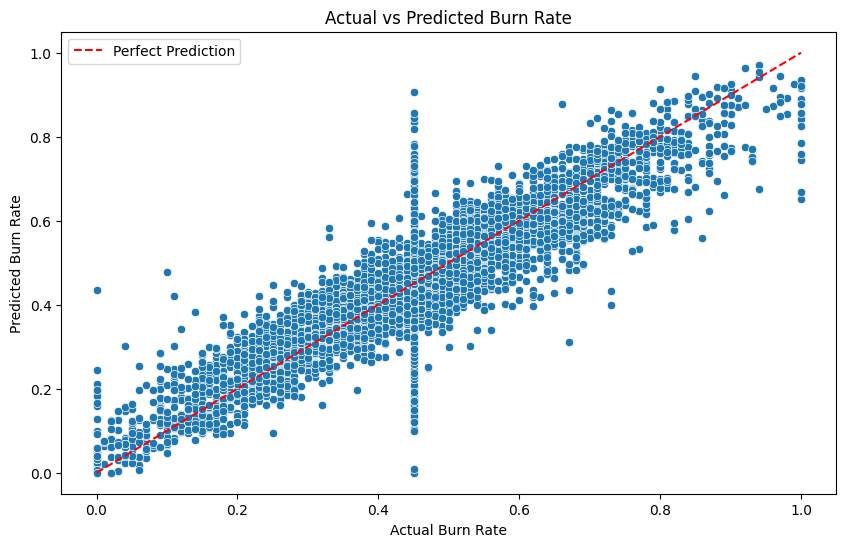

In [27]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect Prediction')
plt.title("Actual vs Predicted Burn Rate")
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.legend()
plt.show()

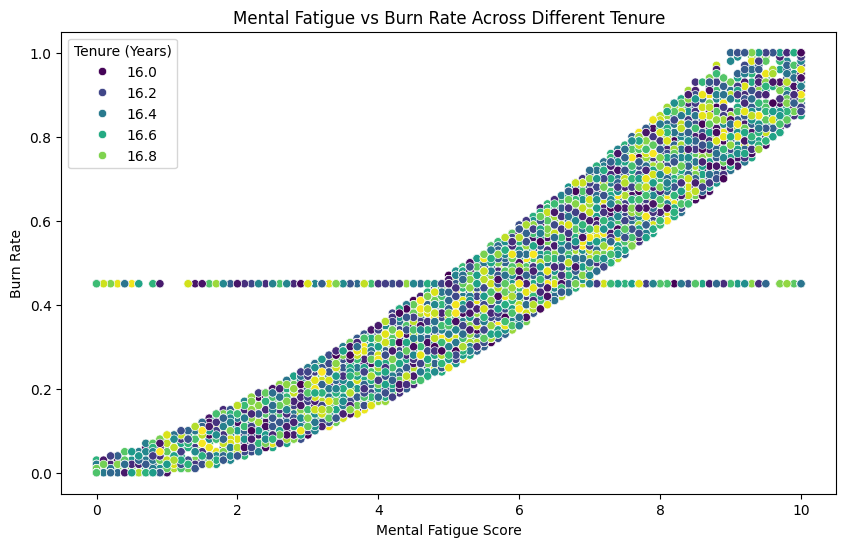

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', hue='Tenure (Years)', data=df, palette='viridis')
plt.title("Mental Fatigue vs Burn Rate Across Different Tenure")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.005763537207207356
Root Mean Squared Error: 0.0759179636661005


In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE scores: {scores}")
print(f"Average Cross-validated MAE: {scores.mean()}")


Cross-validated MAE scores: [-0.05582015 -0.05632532 -0.05538006 -0.05551422 -0.05543735]
Average Cross-validated MAE: -0.05569541925867781
